In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

In [4]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
#eta=eta[0:60,640:720,420:480]
#ssh_mean=ssh_mean[640:720,420:480]
#lon=lon[420:480]
#lat=lat[640:720]
#areamap=array([[0,len(lon)],[0,len(lat)]])
#ssha=eta-ssh_mean

In [5]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
eta=eta[:,620:750,400:500]
ssh_mean=ssh_mean[620:750,400:500]
lon=lon[400:500]
lat=lat[620:750]
areamap=array([[0,len(lon)],[0,len(lat)]])
ssha=eta-ssh_mean

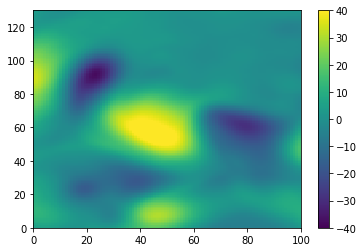

In [6]:
pcolormesh(ssha[0,:,:],vmin=-40,vmax=40)
colorbar()

# Default Values

Eccentricity Fit = 1

Ellipse Fit = 0.85

Gauss Fit = 0.65

In [7]:
eddytd=analyseddyzt(eta,lon,lat,0,90,1,40,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.85,ellipsrsquarefit=0.95,gaussrsquarefit=0.90,\
                    diagnostics=False,pprint=False)

 0% [=========================================================================================>]100% Time Elapsed: 63 s  

In [8]:
eddytdn=analyseddyzt(eta,lon,lat,0,90,1,-40,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.85,ellipsrsquarefit=0.85,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

 0% [=========================================================================================>]100% Time Elapsed: 75 s  

In [9]:
threshold=1
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


In [10]:
eddyfield=eddysplot+eddysplotn
eddyfield[eddyfield==0]=np.nan

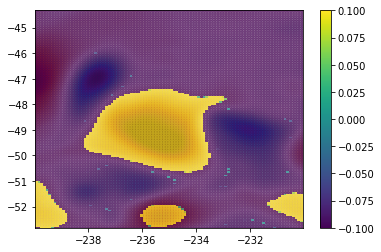

In [11]:
pcolormesh(lon,lat,eddyfield[0,:,:])
colorbar()
pcolormesh(lon,lat,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='stere',lat_0=mean(lat),lon_0=mean(lon),llcrnrlat=latmm.min()-1,urcrnrlat=latmm.max()+1,\
            llcrnrlon=lonmm.min()-1,urcrnrlon=lonmm.max()+1,rsphere=6371200.0,resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,2),labels=[0,0,0,1],fontsize=10)
map.drawparallels(np.arange(0,-360,-1),labels=[1,0,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5,\
                 levels=range(-40,40,5))
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=1)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=90,interval=100,blit=False,repeat=True)
#show()
plt.close()
anim2

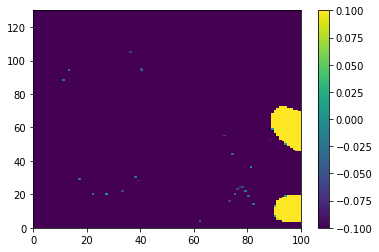

In [49]:
pcolormesh(eddyfield[28,:,:])
colorbar()

# Default Values

Eccentricity Fit = 0.6

Ellipse Fit = 0.85

Gauss Fit = 0.65

In [12]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.75,ellipsrsquarefit=0.85,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

0
0
0
0
[[0]
 [1]]
[[0]
 [1]]
0
0


TypeError: 'int' object is not subscriptable

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.75,ellipsrsquarefit=0.85,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
eddyfield=eddysplot+eddysplotn
eddyfield[eddyfield==0]=np.nan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

# Default Values

Eccentricity Fit = 0.8

Ellipse Fit = 0.5

Gauss Fit = 0.65

In [ ]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.5,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.5,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
eddyfield=eddysplot+eddysplotn
eddyfield[eddyfield==0]=np.nan

In [ ]:
#pcolormesh(eddysplot[0,:,:])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

# Default Values

Eccentricity Fit = 0.8

Ellipse Fit = 0.85

Gauss Fit = 0.90

In [ ]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.85,gaussrsquarefit=0.9,\
                    diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.85,gaussrsquarefit=0.9,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
eddyfield=eddysplot+eddysplotn
eddyfield[eddyfield==0]=np.nan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

# Default Values

Eccentricity Fit = 1

Ellipse Fit = 0.85

Gauss Fit = 0.85

In [ ]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0.85,gaussrsquarefit=0.85,\
                    diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0.85,gaussrsquarefit=0.85,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
eddyfield=eddysplot+eddysplotn
eddyfield[eddyfield==0]=np.nan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

# Default Values

Eccentricity Fit = 0.95

Ellipse Fit = 0.85

Gauss Fit = 0.85

In [ ]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.95,ellipsrsquarefit=0.85,gaussrsquarefit=0.85,\
                    diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.95,ellipsrsquarefit=0.85,gaussrsquarefit=0.85,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
eddyfield=eddysplot+eddysplotn
eddyfield[eddyfield==0]=np.nan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

# Default Values

Eccentricity Fit = 0.8

Ellipse Fit = 0.5

Gauss Fit = 0.5

In [ ]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.5,gaussrsquarefit=0.5,\
                    diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.5,gaussrsquarefit=0.5,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
eddyfield=eddysplot+eddysplotn
eddyfield[eddyfield==0]=np.nan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

# Default Values

Eccentricity Fit = 1

Ellipse Fit = 0.5

Gauss Fit = 0.5

In [ ]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0.5,gaussrsquarefit=0.5,\
                    diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0.5,gaussrsquarefit=0.5,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
eddyfield=eddysplot+eddysplotn
eddyfield[eddyfield==0]=np.nan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

# Default Values

Eccentricity Fit = 1

Ellipse Fit = 0

Gauss Fit = 0

In [ ]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0,gaussrsquarefit=0,\
                    diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-2.5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0,gaussrsquarefit=0,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddysplot=exeddydt(eddytd,lat,lon,ssha,threshold,diagnostics=False)
eddysplotn=exeddydt(eddytdn,lat,lon,ssha,threshold,diagnostics=False)

In [ ]:
eddyfield=eddysplot+eddysplotn
eddyfield[eddyfield==0]=np.nan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2